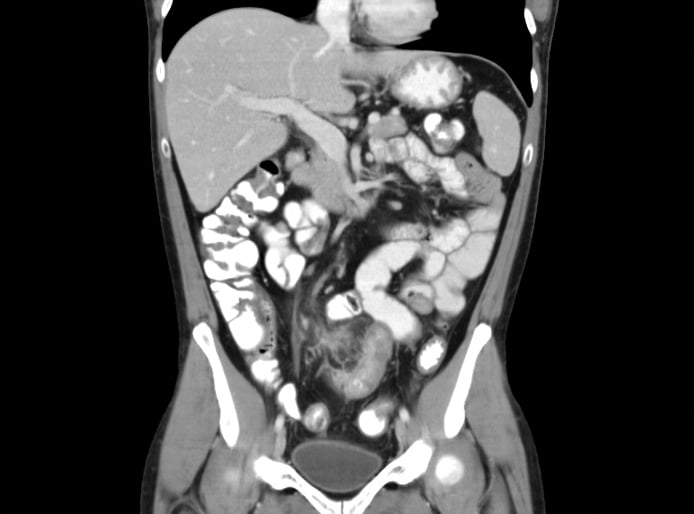

In [2]:
import numpy as np
from PIL import Image, ImageFilter
img1=Image.open('input_img.jpeg')
img1

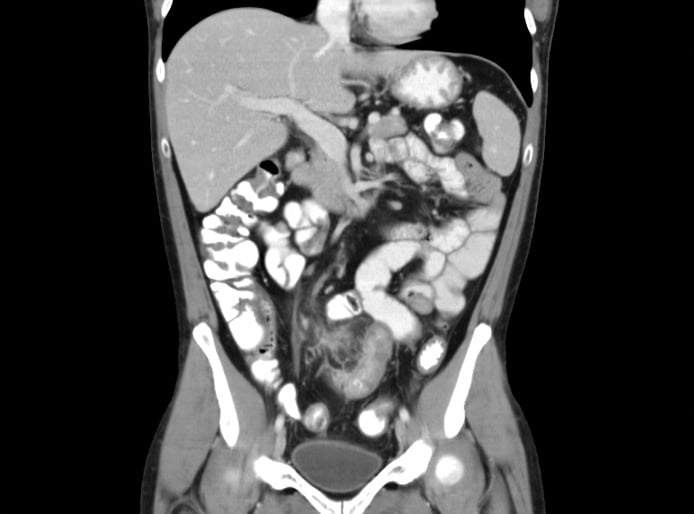

In [3]:
img1bw=img1.convert(mode='L')
img1bw

Stage 1: Create a 2D array for the original image.

In [4]:
img1arr=np.array(img1bw)
img1arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

Stage 2: Perform decimation according to the rule:
            — for odd rows
                I(l,k) = 0 for odd k, I(l,k) for even k;
            — for even rows
                I(l,k) = 0 for even k, I(l,k) for odd k.

In [5]:
rows=len(img1arr)
cols=len(img1arr[0])
for i in range(rows):
    for j in range(cols):
        if i%2!=0:
            if j%2!=0:
                img1arr[i][j]=0 #odd row, odd column
        if i%2==0:
            if j%2==0:
                img1arr[i][j]=0 #even row, even column
img1arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=uint8)

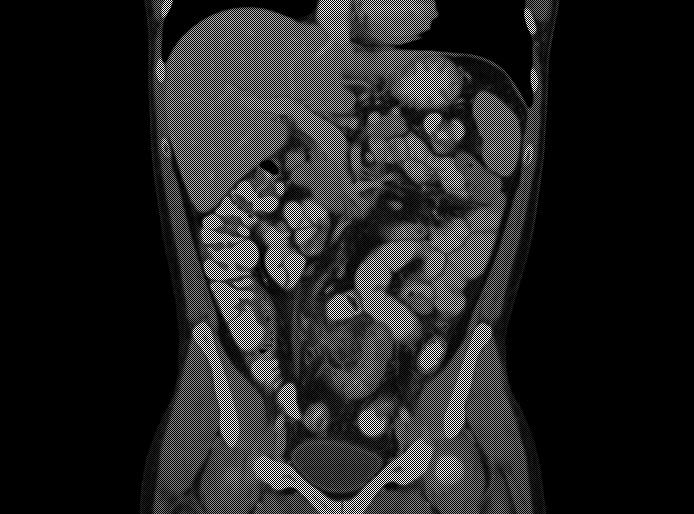

In [6]:
img2arr=img1arr.copy()
img2=Image.fromarray(img2arr)
img2

Stage 3: Remove null elements and create a re-indexed 2D array.

In [7]:
img3arr=[]
for i in range(rows):
    for j in range(cols):
        if i%2!=0:
            if j%2==0:
                img3arr.append(img1arr[i][j])
        elif i%2==0:
            if j%2!=0:
                img3arr.append(img1arr[i][j])
#cols become half their size and rows will take shape accordingly
img3arr=np.reshape(img3arr,(-1,cols//2)) 
img3arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

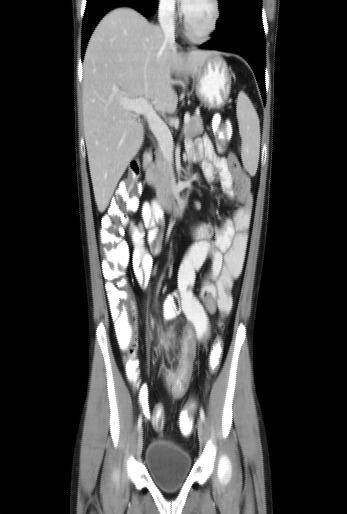

In [8]:
img3=Image.fromarray(img3arr)
img3 #img3 sent

RECEIVING END

Stage 1: Fill the array with zero elements according to the rule:
            — for odd rows
                I(l,k)= 0 for odd k, I(l,k/2) for even k;
            — for even rows
                I(l,k)= 0 for even k, I(l,(k +1) / 2) for odd k.

In [9]:
#img3 recd. needs to be restored to original size
rows1=len(img3arr)
cols1=len(img3arr[0])*2
img4arr=np.zeros((rows1,cols1),dtype='uint8') #array of 0s
for i in range(rows1):
    for j in range(cols1):
        if i%2!=0:
            if j%2==0:
                img4arr[i][j]=img3arr[i][j//2] #odd row, even column
        elif i%2==0:
            if j%2!=0:
                img4arr[i][j]=img3arr[i][j//2] #even row, odd column
img4arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=uint8)

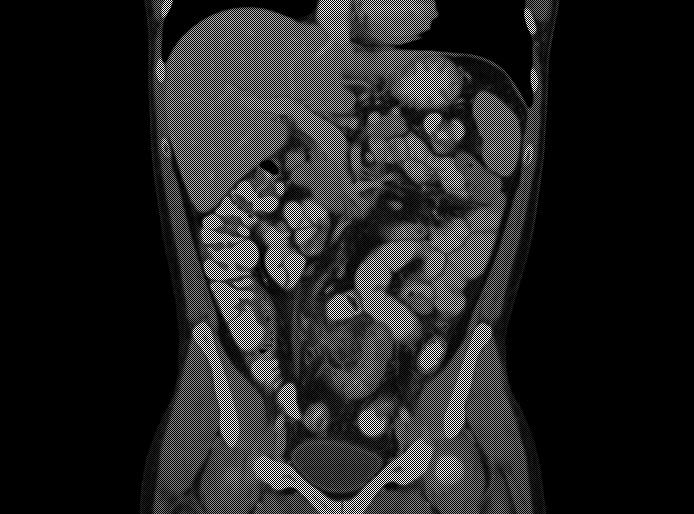

In [10]:
img4=Image.fromarray(img4arr)
img4

Stage 2: Recover the original array by averaging neighbouring zero elements in each row.
            J(l,k) = I(l,k −1)/2+ I(l,k +1)/2

In [11]:
for i in range(rows1):
    for j in range(cols1):
        if i%2!=0:
            if j%2!=0:
                img4arr[i][j] = img4arr[i][j-1]//2 + img4arr[i][(j+1)%cols1]//2
        elif i%2==0:
            if j%2==0:
                img4arr[i][j] = img4arr[i][j-1]//2 + img4arr[i][(j+1)%cols1]//2
img4arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=uint8)

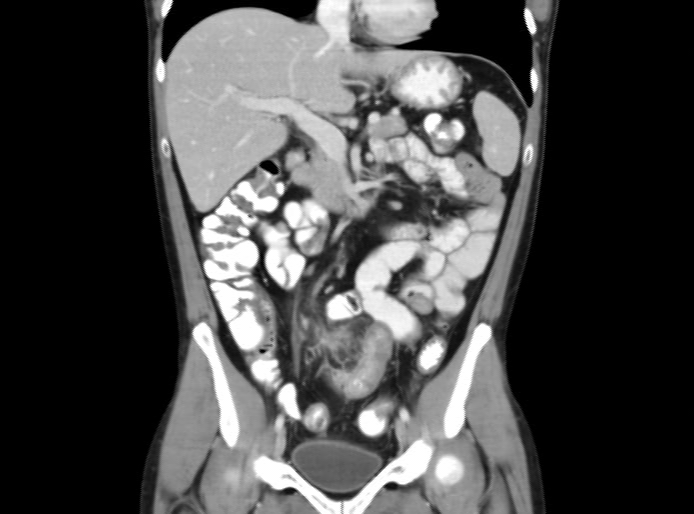

In [12]:
img4 = Image.fromarray(img4arr)
img4

Stage 3: Recover the original array by averaging columns in a sliding window:
            I′(l,k)=J(l−1,k)/2+J(l,k)/2

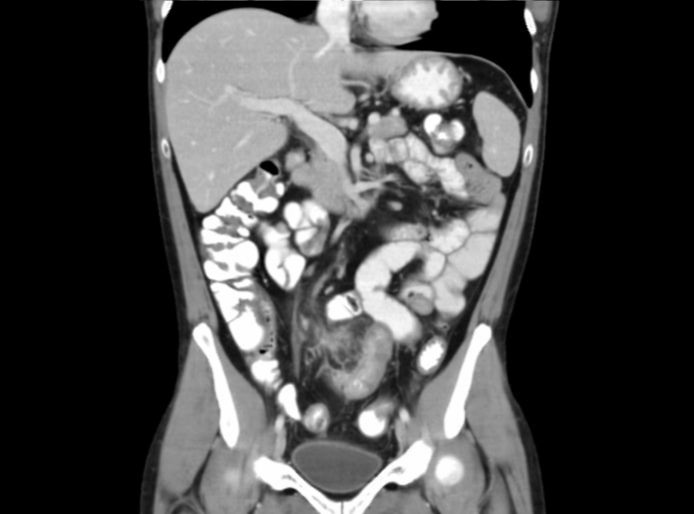

In [13]:
finimgarr = np.zeros((rows1,cols1),dtype='uint8')
for i in range(cols1):
    for j in range(rows1):
        finimgarr[j][i] = img4arr[j-1][i]//2 + img4arr[j][i]//2
finimg = Image.fromarray(finimgarr)
finimg

Quality evaluation of restored image by mean squared error criterion.

In [14]:
X=(img1arr-finimgarr)
Y=img3arr
for i in range (rows):
    for j in range (cols):
        X[i][j]=X[i][j]**2
for i in range (rows):
    for j in range (cols//2):
        Y[i][j]=Y[i][j]**2
Y=np.sum(Y)
X=np.sum(X)
np.sqrt(X/Y)

1.1019649868452823